<a href="https://colab.research.google.com/github/XandreNicolson/XandreNicolson/blob/main/Activity__Course_7_Salifort_Motors_project_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


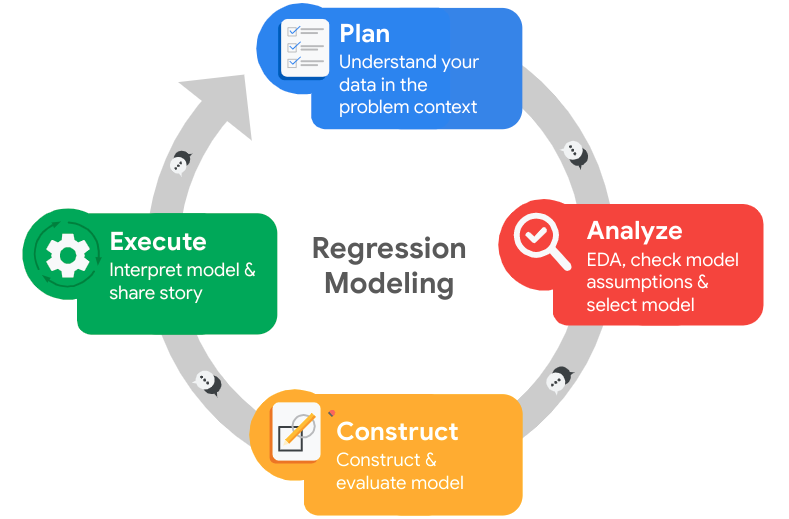

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The HR Department are the stakeholders, as well as the Company Leaders.

The goal is to create a predictive model for employee turnover, in hopes of retaining employees longer.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [ ]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
import pickle as pkl

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier



### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
### YOUR CODE HERE ###
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [ ]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'Work_accident': 'accident',
                   'Department': 'department',
                   'promotion_last_5years': 'promotion',
                   'satisfaction_level': 'sat_level',
                   'last_evaluation': 'last_eval',
                   'average_montly_hours':'average_monthly_hr',
                   'time_spend_company':'tenure'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.dtypes

sat_level              float64
last_eval              float64
number_project           int64
average_monthly_hrs      int64
tenure                   int64
accident                 int64
left                     int64
promotion                int64
department              object
salary                  object
dtype: object

### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

sat_level              0
last_eval              0
number_project         0
average_monthly_hrs    0
tenure                 0
accident               0
left                   0
promotion              0
department             0
salary                 0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

There are 3008 duplicates, which is about 20% of our data.

In [ ]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head(30)

,sat_level,last_eval,number_project,average_monthly_hrs,tenure,accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


Though this represents a large amount of our data, given the number variables and their potential ranges, it seems likely this is just sloppy data maintence and that employees were entered multiple times.

In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1= df0.drop_duplicates()


### Check outliers

Check for outliers in the data.

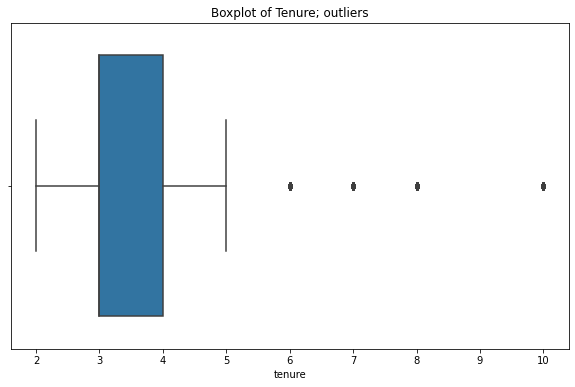

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
plt.title('Boxplot of Tenure; outliers')
sns.boxplot(x=df1['tenure'])
plt.show();



In [ ]:
# Determine the number of rows containing outliers
# find IQR
q1=df1['tenure'].quantile(.25)
q3=df1['tenure'].quantile(.75)
iqr=q3-q1

#find threshold
threshold= q3 + 1.5*iqr

#count number of outliers
outlier_count = df1[df1['tenure'] >threshold]
len(outlier_count)

824

Though we have 824 outliers, we will keep them in the data since they have little negative effect onf RandomForest Models

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [ ]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


Here we see that about 16.6% of employees have left. Though we are unbalanced we are not out of range where we would need to upsample for the model.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
df1.dtypes

sat_level              float64
last_eval              float64
number_project           int64
average_monthly_hrs      int64
tenure                   int64
accident                 int64
left                     int64
promotion                int64
department              object
salary                  object
dtype: object

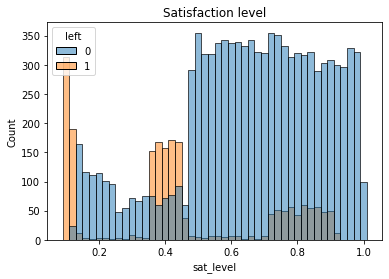

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
ax =sns.histplot(data=df1, x='sat_level', hue = 'left', binwidth = .02)
ax.set_title('Satisfaction level');

As to be expected, most of those that left general had lower levels of satisfaction.

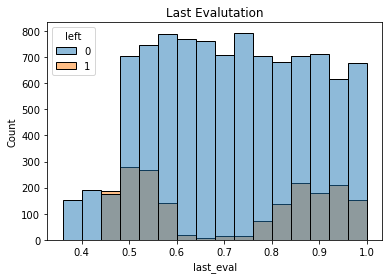

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
ax =sns.histplot(data=df1, x='last_eval', hue = 'left', binwidth=0.04)
ax.set_title('Last Evalutation');

With the company evalutions we see an interesting U-shape appear:
Those who left were either scoring low or high. Low makes sense in that they were not performing well. But those who scored well also left, perhaps becuase they found better benefits in at another company?

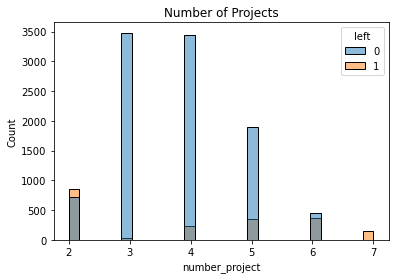

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
ax =sns.histplot(data=df1, x='number_project', hue = 'left')
ax.set_title('Number of Projects');

Again, we have a U-shape with number of projects. Most of those that stayed had an average number of projects. Those who left were either underworked or over worked.

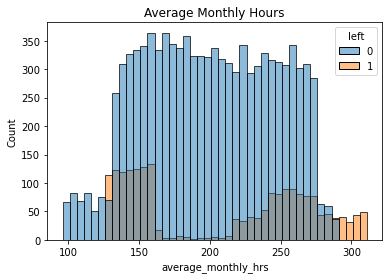

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
ax =sns.histplot(data=df1, x='average_monthly_hrs', hue = 'left', binwidth= 5)
ax.set_title('Average Monthly Hours');

Though the U-shape persists, it is important to note that a majority of those who left were working 220-315hrs a month. That is equalivant to 50-70hrs a week, which is quite above the modern average.

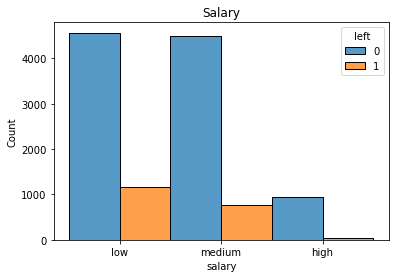

In [ ]:
# Create a plot as needed
ax =sns.histplot(data=df1, x='salary', hue = 'left', multiple='dodge')
ax.set_title('Salary');

No suprise that most employees who left had low salaries but it does not seem to be different than the spread of those who left. For the time being we will keep the variable.

Tenure, Accident, Promotion, Department, showed no insight between those who left and those who stayed. Thus we will drop them from the dataset for modeling.

### Insights

The features of Satisfaction, Evaluations, number of hours worked, and number of houses all have the most illustrative differences between those who stayed and the employees that left.
Thus some combination of overworked and poor management seems to be at the heart of employee turn over.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We are looking to predict whether or not an employee will leave the company. For this we will will a Random Forest to model the behavior.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
#copy the dataset
df=df1.copy()

#Isolate the outcome variable
y=df['left']

#Isolate the features we will use in modeling.
X=df.drop(columns=['left', 'tenure', 'promotion', 'department','accident'], axis=1)

#encode salary column to ordianl numeric catagory
X['salary'] = (df['salary'].astype('category').cat.set_categories(['low','medium','high'])
               .cat.codes)

X.head(10)

,sat_level,last_eval,number_project,average_monthly_hrs,salary
0,0.38,0.53,2,157,0
1,0.80,0.86,5,262,1
2,0.11,0.88,7,272,1
3,0.72,0.87,5,223,0
4,0.37,0.52,2,159,0
5,0.41,0.50,2,153,0
6,0.10,0.77,6,247,0
7,0.92,0.85,5,259,0
8,0.89,1.00,5,224,0
9,0.42,0.53,2,142,0


In [ ]:
#Split the data set in to train, validation, and test sets
X_trn, X_test, y_trn, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_trn, y_trn, test_size=0.25, stratify=y_trn, random_state=42)

#test the splits make sense
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(7194, 5)
(2398, 5)
(2399, 5)


In [ ]:
#Instanate the RandomForest Model
rf= RandomForestClassifier(random_state=42)

#Assign the hyperparamters we will measure
cv_para={'min_samples_leaf': [1,2],
        'min_samples_split':[2,3],
        'max_depth':[5],
        'n_estimators': [50, 500],
        'max_features':['sqrt'],
        'max_samples':[.4]}

#scoring variable
scoring=['f1', 'precision', 'accuracy','recall']

#GridSearch with cross validation

rf_cv=GridSearchCV(rf, cv_para, scoring=scoring, cv=4, refit ='recall')


Since we want to detach more positives at the expense of being right (in other words it is better to predict an employee leaving rather than miss them) we will focus on recall.

In [ ]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 20.6 s, sys: 68.9 ms, total: 20.6 s
Wall time: 20.6 s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
rf_cv.best_score_

0.672813180399991

In [ ]:
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'max_samples': 0.4,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                        })

    return table

In [ ]:
rf_cv_results = make_results('rf_cv', rf_cv, 'recall')
rf_cv_results

,model,precision,recall,F1,accuracy
0,rf_cv,0.975947,0.672813,0.796265,0.942869


In [ ]:
%%time
#run with validation data
rf_cv.fit(X_val, y_val)

CPU times: user 14.1 s, sys: 86.2 ms, total: 14.2 s
Wall time: 14.2 s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'max_samples': 0.4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
cv_rf_val_results=make_results('cv_rf', rf_cv, 'recall')
print(rf_cv_results)
print(cv_rf_val_results)

   model  precision    recall        F1  accuracy
0  rf_cv   0.975947  0.672813  0.796265  0.942869
   model  precision    recall        F1  accuracy
0  cv_rf   0.967141  0.655732  0.781396  0.939116


Our performance went down slightly with the validation data but lets take a look with the final test.

In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                         })

    return table

In [ ]:
test_score = get_scores('test', rf_cv, X_test, y_test)
print(test_score)
print(rf_cv_results)
print(cv_rf_val_results)

  model  precision    recall       f1  accuracy
0  test   0.973422  0.736181  0.83834  0.952897
   model  precision    recall        F1  accuracy
0  rf_cv   0.975947  0.672813  0.796265  0.942869
   model  precision    recall        F1  accuracy
0  cv_rf   0.967141  0.655732  0.781396  0.939116


The test data saw a subtantial improvement over the validation for Recall and f1. Now let us take a look at the breakdown of the results with a confusion matrix

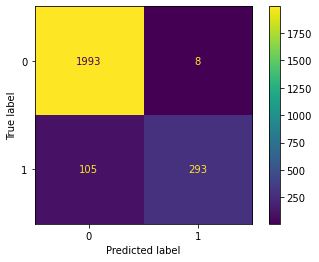

In [ ]:
#create a confusion matrix
preds = rf_cv.best_estimator_.predict(X_test)
cm= confusion_matrix(y_test, preds, labels=rf_cv.classes_)

#display the confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)
disp.plot(values_format='');

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Overall our model did well in predicting whether or not an employee would leave, though further refinement is needed to address the 105 false-negatives since these are missed opportunities.


Perhaps adding back some of the variables we took out could help. Or further exploring and extracting variables from the variables we used in this model.


### Conclusion, Recommendations, Next Steps
We would like to do further investigation into the data in order to refine our RandomForest model.
As for recommendations the company can apply now:
Restrict number of projects an employee is assigned.

Address long sustained hours by having employees finishing long projects be assigned to relatively easier ones.

Have routine check in with employees where there can be an open dialog on satisfaction and challenges.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.